In [1]:
import os, shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import optimizers
from keras import regularizers
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# check image directory 

base_dir = 'C:/Users/vuduc/train_test_split_data/'
train_dir = os.path.join(base_dir, 'train')
print(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
print(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# print(test_dir)

C:/Users/vuduc/train_test_split_data/train
C:/Users/vuduc/train_test_split_data/validation


In [3]:
num_class = 19
batch = 32
weight_decay = 1e-4

# propose CNN model
model = Sequential()
model.add(Conv2D(batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(72, 96, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(2*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(4*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(8*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(8*batch, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(num_class, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 96, 32)        320       
                                                                 
 activation (Activation)     (None, 72, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 72, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 96, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 96, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 72, 96, 32)       128       
 hNormalization)                                        

In [4]:
# training optimize
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
learning_rate = 1e-4
momentum = 0.9
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate, momentum=momentum, decay=1e-6), #Decrease learning rate
              metrics=['accuracy'])

arg = ImageDataGenerator(rotation_range=0.1, zoom_range=0.1, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(72, 96), # resize img to 112x112
        batch_size= 32, 
        color_mode='grayscale',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size= 32,
        color_mode='grayscale',
        class_mode='categorical')

Found 5320 images belonging to 19 classes.
Found 2281 images belonging to 19 classes.


In [5]:
#Training and validation

history = model.fit(
      train_generator,
      epochs= 30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
167/167 [==============================] - 200s 1s/step - loss: 0.8461 - accuracy: 0.8267 - val_loss: 19.5395 - val_accuracy: 0.0519
Epoch 2/30
167/167 [==============================] - 186s 1s/step - loss: 0.2366 - accuracy: 0.9635 - val_loss: 25.0474 - val_accuracy: 0.0538
Epoch 3/30
167/167 [==============================] - 194s 1s/step - loss: 0.1981 - accuracy: 0.9778 - val_loss: 6.7850 - val_accuracy: 0.5619
Epoch 4/30
167/167 [==============================] - 173s 1s/step - loss: 0.0982 - accuracy: 0.9898 - val_loss: 0.0954 - val_accuracy: 0.9900
Epoch 5/30
167/167 [==============================] - 191s 1s/step - loss: 0.0808 - accuracy: 0.9936 - val_loss: 1.1810 - val_accuracy: 0.9206
Epoch 6/30
167/167 [==============================] - 184s 1s/step - loss: 0.0811 - accuracy: 0.9938 - val_loss: 2.5956 - val_accuracy: 0.8069
Epoch 7/30
167/167 [==============================] - 182s 1s/step - loss: 0.0961 - accuracy: 0.9934 - val_loss: 0.0897 - val_accuracy: 0.99

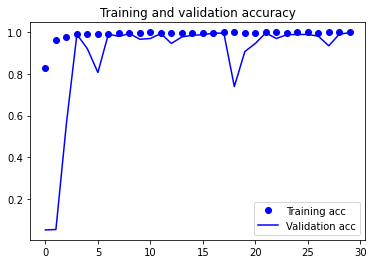

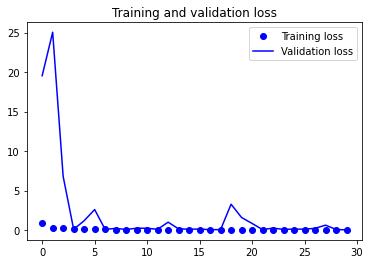

In [6]:
#Plot of the loss and accuracy during training

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=2,
        color_mode='grayscale',
        class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=30)

NameError: name 'test_dir' is not defined

In [ ]:
# Hyperparameter tunning - optimize parameter

learning_rates = [0.001, 0.01, 0.05, 0.005]
momentums = [0.7 , 0.75, 0.8 , 0.85, 0.9, 0.95]
kernel_size = [3, 5, 7]
number_of_block = [3, 4, 5, 6, 7]
network_deep = [2, 3, 4]
epochs = [20, 30, 40, 50]

def add_block(num_layer, kernel_size):
    for i in range num_layer:
        model.add(Conv2D(batch, (kernel_size, kernel_size), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(72, 96, 1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

def remove_all_current_layer(block, net_deep):
    num_layer = lens(model.layers)
    for i in range(num_layer):
        model.layers.pop()
    
    
for block in number_of_block:
    for net_deep in network_deep:
        for kernel in kernel_size:
            for i in range(block):
                add_block(net_deep, kernel)
            for learning_rate in learning_rates:
                for momentum in momentums:
                    #finish model
                    model.add(Flatten())
                    model.add(Dense(num_class, activation='softmax'))
                    # compile model
                    model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.RMSprop(learning_rate=learning_rate, momentum=momentum, decay=1e-6), #Decrease learning rate
                    metrics=['accuracy'])
                    
                    #fit data to model
                    history = model.fit(
                              train_generator,
                              batch_size=32, 
                              epochs= 40,
                              validation_data=validation_generator,
                              validation_steps=100)
                    # after training => get final acc and loss
                    
                    acc = history.history['accuracy']
                    val_acc = history.history['val_accuracy']
                    loss = history.history['loss']
                    val_loss = history.history['val_loss']
                    
                    
        remove_all_current_layer(block, net_deep)
        
